In [1]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [5]:
df = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\Salary_Data.csv")
print(df.head())


   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


In [25]:
X= df["YearsExperience"].values
Y= df["Salary"].values

In [26]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [27]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

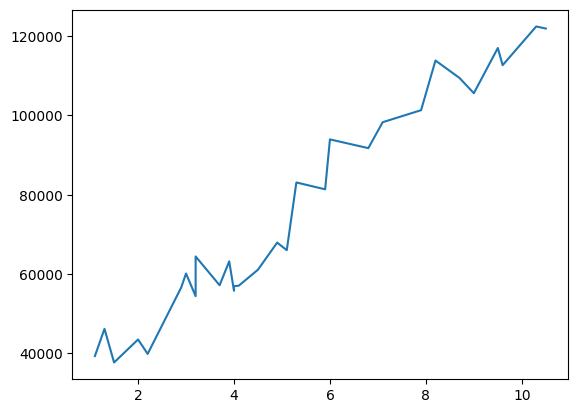

In [28]:
plt.plot(X,Y)

In [29]:
X=np.array(X)
Y=np.array(Y)

In [30]:
def mean(X):
    return np.sum(X)/len(X)

In [32]:
def variance(X):
    mean_value = mean(X)
    return np.sum((X-mean_value)**2)/len(X)

In [37]:
def norm(X):
    mean_value = mean(X)
    variance_value=variance(X)
    return ((X-mean_value))/np.sqrt(variance_value)

In [38]:
X_norm = norm(X)

In [39]:
X_norm

array([-1.51005294, -1.43837321, -1.36669348, -1.18749416, -1.11581443,
       -0.86493538, -0.82909552, -0.75741579, -0.75741579, -0.57821647,
       -0.50653674, -0.47069688, -0.47069688, -0.43485702, -0.29149756,
       -0.1481381 , -0.07645838, -0.00477865,  0.21026054,  0.2461004 ,
        0.53281931,  0.6403389 ,  0.92705781,  1.03457741,  1.21377673,
        1.32129632,  1.50049564,  1.5363355 ,  1.78721455,  1.85889428])

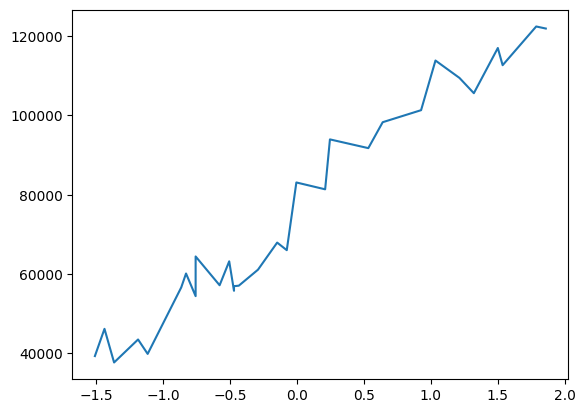

In [41]:
plt.plot(X_norm,Y)

In [49]:
import random

In [50]:
class SimpleLR:
    def __init__(self, lr=0.1, max_iter=2000, threshold=1e-6):
        self.lr = lr
        self.max_iter = max_iter
        self.threshold = threshold
        self.weight = random.uniform(-1,1)
        self.bias = random.uniform(-1,1)
    def predict(self, X):
        return self.weight*X + self.bias
    def fit(self, X, Y):
        n = len(X)
        loss_history = []
        y_pred = self.predict(X)
        errors = Y-y_pred
        prev_loss = (1/(2*n)) * np.sum(errors**2)
        loss_history.append(prev_loss)
        for i in range(self.max_iter):
            w_grad = (1/n) * np.sum(errors*X)
            b_grad = (1/n) * np.sum(errors)
            self.weight += self.lr * w_grad
            self.bias += self.lr * b_grad
            y_pred = self.predict(X)
            errors = Y-y_pred
            curr_loss = (1/(2*n)) * np.sum(errors**2)
            if np.abs(curr_loss - prev_loss) < self.threshold:
                break
            prev_loss = curr_loss
            loss_history.append(curr_loss)
        return loss_history
    def plot(self, X, Y):
        y_pred = self.predict(X)
        plt.plot(X,Y)
        plt.plot(X,y_pred)

In [51]:
model = SimpleLR()

In [52]:
loss_history = model.fit(X_norm, Y)

In [53]:
loss_history

[np.float64(3251442073.240196),
 np.float64(2636638819.7381754),
 np.float64(2138648184.4015388),
 np.float64(1735275769.778863),
 np.float64(1408544113.9344954),
 np.float64(1143891472.7005582),
 np.float64(929522833.3010689),
 np.float64(755884235.3874825),
 np.float64(615236971.0774775),
 np.float64(501312686.9863735),
 np.float64(409034016.87257934),
 np.float64(334288294.080406),
 np.float64(273744258.6187455),
 np.float64(224703589.89480057),
 np.float64(184980648.2284052),
 np.float64(152805065.47862497),
 np.float64(126742843.4513029),
 np.float64(105632443.60917203),
 np.float64(88533019.73704605),
 np.float64(74682486.40062399),
 np.float64(63463554.3981221),
 np.float64(54376219.47609567),
 np.float64(47015478.18925415),
 np.float64(41053277.74691257),
 np.float64(36223895.388615884),
 np.float64(32312095.67839552),
 np.float64(29143537.9131171),
 np.float64(26577006.123241525),
 np.float64(24498115.37344233),
 np.float64(22814213.866104968),
 np.float64(21450253.64516173),


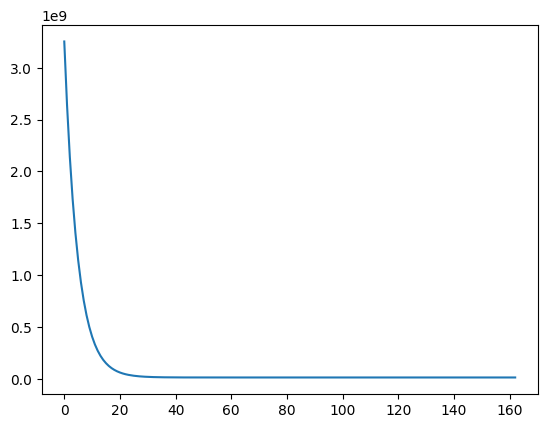

In [54]:
plt.plot(loss_history)

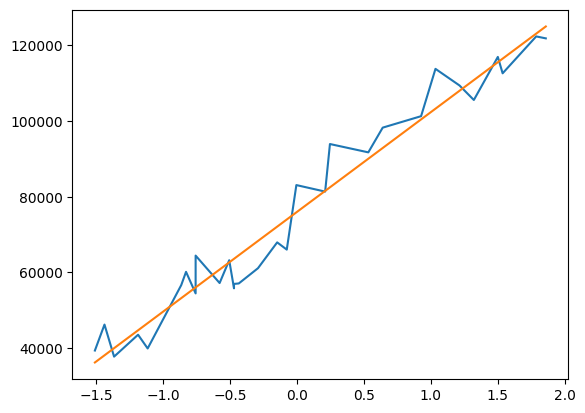

In [55]:
model.plot(X_norm,Y)